In [5]:
%matplotlib inline
import time
import datetime
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

import sys
sys.path.append('../scripts')

%load_ext autoreload
%autoreload 2
import TTM_analysis_utils as TTMUtil

# Display entire width of browser
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
from os.path import expanduser

tmp_dir = '%s/tmp' % (expanduser("~"))
ws_dir = '%s/workspace' % (expanduser("~"))

# new way (UDP):
#legacy, fname = False, '%s/TTM_Vibration/template.34811/wafer.1/imprint.1/TTMLogStream.1' % (tmp_dir)
legacy, fname = False, '%s/TTM_Vibration/template.34828/wafer.1/imprint.1/TTMLogStream.1' % (tmp_dir)

## old way (TCP)
#legacy, fname = False, '%s/stats/template.31159/wafer.1/imprint.1/TTMLogStream.1' % (ws_dir)
#legacy, fname = True, '%s/TTMLogStream_TEST.csv' % (tmp_dir)

f = open(fname, 'r')
ttm = f.readlines()
f.close()
print("Unfiltered len:", len(ttm))

ttm[:] = [element for element in ttm if TTMUtil.include_element(element)]

print("Filtered len  :", len(ttm))

Unfiltered len: 3652
Filtered len  : 3652


In [63]:
ds_keys_2017_05_17_19 = [
    (30167, 'Good'),(30169, 'Good'),(30170, 'Good'),(30171, 'Good'),(30172, 'Good'),
    (30173, 'Vibration'),
    (30174, 'Good'),(30175, 'Good'),(30176, 'Good'),(30177, 'Good'),(30178, 'Good'),(30179, 'Good'),(30179, 'Good'),
    (30179, 'Good'),(30184, 'Good'),(30186, 'Good'),(30188, 'Good'),(30190, 'Good'),(30192, 'Good'),(30194, 'Good'),
    (30196, 'Good'),(30198, 'Good'),
    (30271, 'Spike'),
    (30273, 'Good'),(30275, 'Good'),(30277, 'Good'),
    (30279, 'Spike'),
    (30281, 'Good'),(30283, 'Good'),(30285, 'Good')
]

ds_keys_latest = [
    (31159, 'Good'),
    (31157, 'Spike')
]

ds_keys = ds_keys_2017_05_17_19

In [64]:
numCams = 4
cols, col_ids = TTMUtil.define_columns_and_ids(numCams, legacy)

print("cols:", cols)
print("\ncol_ids:", col_ids)

cols: ['TS', 'time_s', 'time_offset_s', 'numread', 'TTMNumComplete', 'TTMNumPartial', 'TTM_SerialNum', 'Cam1_TimeStamp', 'Cam2_TimeStamp', 'Cam3_TimeStamp', 'Cam4_TimeStamp', 'C0 measx_mm', 'C0 scorex', 'C0 measy_mm', 'C0 scorey', 'C0 cmeasx_mm', 'C0 cscorex', 'C0 cmeasy_mm', 'C0 cscorey', 'C0 x unwrap cnt', 'C0 y unwrap cnt', 'C0 post measx_mm', 'C0 post measy_mm', 'C0 post cmeasx_mm', 'C0 post cmeasy_mm', 'C1 measx_mm', 'C1 scorex', 'C1 measy_mm', 'C1 scorey', 'C1 cmeasx_mm', 'C1 cscorex', 'C1 cmeasy_mm', 'C1 cscorey', 'C1 x unwrap cnt', 'C1 y unwrap cnt', 'C1 post measx_mm', 'C1 post measy_mm', 'C1 post cmeasx_mm', 'C1 post cmeasy_mm', 'C2 measx_mm', 'C2 scorex', 'C2 measy_mm', 'C2 scorey', 'C2 cmeasx_mm', 'C2 cscorex', 'C2 cmeasy_mm', 'C2 cscorey', 'C2 x unwrap cnt', 'C2 y unwrap cnt', 'C2 post measx_mm', 'C2 post measy_mm', 'C2 post cmeasx_mm', 'C2 post cmeasy_mm', 'C3 measx_mm', 'C3 scorex', 'C3 measy_mm', 'C3 scorey', 'C3 cmeasx_mm', 'C3 cscorex', 'C3 cmeasy_mm', 'C3 cscorey', '

In [65]:
data_ranges, data_sets_rough = TTMUtil.parse_into_data_sets(ttm)

Data set 0, range: 0 - 3651 (total: 3651)
[0] range: doTTMClientWork: 2017-08-17 16:09:19.984 -> doTTMClientWork: 2017-08-17 16:09:29.471


In [66]:
v= TTMUtil.validate_columns_rough(data_sets_rough)
print( "For rough data, column_cnt: num_records", v)

For rough data, column_cnt: num_records {73: 3651}


In [67]:
data_sets = []
for idx, data_set in enumerate(data_sets_rough):
    data_sets.append(TTMUtil.cleanup_and_format_data_set(data_set, legacy))

In [68]:
v= TTMUtil.validate_columns_cleanedup(data_sets)
print( "For cleaned-up data, column_cnt: num_records", v)

For cleaned-up data, column_cnt: num_records {67: 3651}


In [28]:
ds = data_sets[0]  #Xiaoming thinks this one had spike...

# for col_id in col_ids.keys():
#     print("%s [%d]: %s" % (col_id, col_ids[col_id], str(ds[15][4][col_ids[col_id]])))
#     #print("%s: " % (col_id))
count =len(ds)
print("count:", count)

# for idx, ds in enumerate(data_sets):
#     print("[%d] len: %d" %(idx, len(ds)))

count: 3651


In [78]:
TTMUtil.unwrap(-0.0003709, -0.002479, 0)

(2, -0.0023709)

In [79]:
TTMUtil.unwrap(ds[15][col_ids['C3 measx_mm']], ds[15][col_ids['C3 cmeasx_mm']], ds[15][col_ids['C3 cscorex']])


(0, -7e-06)

In [69]:
for idx, ds in enumerate(data_sets):
    validx = {0:0, 1:0, 2:0, 3:0, 4:0}
    validy = {0:0, 1:0, 2:0, 3:0, 4:0}
    validx_records = []
    validy_records = []
    for d in ds:
        x = 4-(d[col_ids['C0 cscorex']] + d[col_ids['C1 cscorex']] + d[col_ids['C2 cscorex']] + d[col_ids['C3 cscorex']])
        if x not in validx:
            validx[x] = 0
        else:
            validx[x] += 1

        y = 4-(d[col_ids['C0 cscorey']] + d[col_ids['C1 cscorey']] + d[col_ids['C2 cscorey']] + d[col_ids['C3 cscorey']])
        if y not in validy:
            validy[y] = 0
        else:
            validy[y] += 1

    df = pd.DataFrame.from_records(ds, columns=cols)
    df_c0x = df['C0 post measx_mm']
    df_c0y = df['C0 post measy_mm']
    df_c1x = df['C1 post measx_mm']
    df_c1y = df['C1 post measy_mm']
    df_c2x = df['C2 post measx_mm']
    df_c2y = df['C2 post measy_mm']
    df_c3x = df['C3 post measx_mm']
    df_c3y = df['C3 post measy_mm']

    #     if d[col_ids['C0 cscorex']] == 0: validx_cnt += 1
    #     if d[col_ids['C1 cscorex']] == 0: validx_cnt += 1
    #     if d[col_ids['C2 cscorex']] == 0: validx_cnt += 1
    #     if d[col_ids['C3 cscorex']] == 0: validx_cnt += 1
    #     if d[col_ids['C0 cscorey']] == 0: validy_cnt += 1
    #     if d[col_ids['C1 cscorey']] == 0: validy_cnt += 1
    #     if d[col_ids['C2 cscorey']] == 0: validy_cnt += 1
    #     if d[col_ids['C3 cscorey']] == 0: validy_cnt += 1
    
    print("-------------------------------------------------")
    print("Dataset num: %d, template: %d, XLu's note: %s" % (idx, ds_keys[idx][0], ds_keys[idx][1]))
    print("valid x cnts:", validx)
    print("valid y cnts:", validy)
    print("C0 X min: %+f, max: %+f, mean: %+f, std: %f" % (df_c0x.min(), df_c0x.max(), df_c0x.mean(),df_c0x.std()))
    print("C0 Y min: %+f, max: %+f, mean: %+f, std: %f" % (df_c0y.min(), df_c0y.max(), df_c0y.mean(),df_c0y.std()))
    print("C1 X min: %+f, max: %+f, mean: %+f, std: %f" % (df_c1x.min(), df_c1x.max(), df_c1x.mean(),df_c1x.std()))
    print("C1 Y min: %+f, max: %+f, mean: %+f, std: %f" % (df_c1y.min(), df_c1y.max(), df_c1y.mean(),df_c1y.std()))
    print("C2 X min: %+f, max: %+f, mean: %+f, std: %f" % (df_c2x.min(), df_c2x.max(), df_c2x.mean(),df_c2x.std()))
    print("C2 Y min: %+f, max: %+f, mean: %+f, std: %f" % (df_c2y.min(), df_c2y.max(), df_c2y.mean(),df_c2y.std()))
    print("C3 X min: %+f, max: %+f, mean: %+f, std: %f" % (df_c3x.min(), df_c3x.max(), df_c3x.mean(),df_c3x.std()))
    print("C3 Y min: %+f, max: %+f, mean: %+f, std: %f" % (df_c3y.min(), df_c3y.max(), df_c3y.mean(),df_c3y.std()))


-------------------------------------------------
Dataset num: 0, template: 30167, XLu's note: Good
valid x cnts: {0: 0, 1: 0, 2: 0, 3: 0, 4: 3651}
valid y cnts: {0: 0, 1: 0, 2: 0, 3: 0, 4: 3651}
C0 X min: -0.000160, max: +0.000060, mean: +0.000006, std: 0.000014
C0 Y min: -0.000418, max: +0.000875, mean: +0.000001, std: 0.000028
C1 X min: -0.000163, max: +0.000036, mean: -0.000005, std: 0.000013
C1 Y min: -0.000407, max: +0.000887, mean: -0.000005, std: 0.000027
C2 X min: -0.000208, max: +0.000042, mean: +0.000001, std: 0.000017
C2 Y min: -0.000417, max: +0.000888, mean: +0.000004, std: 0.000027
C3 X min: -0.000192, max: +0.000058, mean: -0.000002, std: 0.000015
C3 Y min: -0.000441, max: +0.000844, mean: -0.000002, std: 0.000028


('TS', 0), ('time_s', 1), ('time_offset_s', 2), ('numread', 3), ('TTMNumComplete', 4), ('TTMNumPartial', 5), 

('TTM_SerialNum', 6), ('Cam1_TimeStamp', 7), ('Cam2_TimeStamp', 8), ('Cam3_TimeStamp', 9), ('Cam4_TimeStamp', 10), 

('C0 measx_mm', 11), ('C0 scorex', 12), ('C0 measy_mm', 13), ('C0 scorey', 14), ('C0 cmeasx_mm', 15), ('C0 cscorex', 16), ('C0 cmeasy_mm', 17), ('C0 cscorey', 18), ('C0 x unwrap cnt', 19), ('C0 y unwrap cnt', 20), ('C0 post measx_mm', 21), ('C0 post measy_mm', 22), ('C0 post cmeasx_mm', 23), ('C0 post cmeasy_mm', 24), 

('C1 measx_mm', 25), ('C1 scorex', 26), ('C1 measy_mm', 27), ('C1 scorey', 28), ('C1 cmeasx_mm', 29), ('C1 cscorex', 30), ('C1 cmeasy_mm', 31), ('C1 cscorey', 32), ('C1 x unwrap cnt', 33), ('C1 y unwrap cnt', 34), ('C1 post measx_mm', 35), ('C1 post measy_mm', 36), ('C1 post cmeasx_mm', 37), ('C1 post cmeasy_mm', 38), 

('C2 measx_mm', 39), ('C2 scorex', 40), ('C2 measy_mm', 41), ('C2 scorey', 42), ('C2 cmeasx_mm', 43), ('C2 cscorex', 44), ('C2 cmeasy_mm', 45), ('C2 cscorey', 46), ('C2 x unwrap cnt', 47), ('C2 y unwrap cnt', 48), ('C2 post measx_mm', 49), ('C2 post measy_mm', 50), ('C2 post cmeasx_mm', 51), ('C2 post cmeasy_mm', 52), 

('C3 measx_mm', 53), ('C3 scorex', 54), ('C3 measy_mm', 55), ('C3 scorey', 56), ('C3 cmeasx_mm', 57), ('C3 cscorex', 58), ('C3 cmeasy_mm', 59), ('C3 cscorey', 60), ('C3 x unwrap cnt', 61), ('C3 y unwrap cnt', 62), ('C3 post measx_mm', 63), ('C3 post measy_mm', 64), ('C3 post cmeasx_mm', 65), ('C3 post cmeasy_mm', 66)

In [15]:
def plot_series(df, title_str, query_str, save_pdf):
    df_sub = df.query(query_str)
    
    df_labels = [
        ('Cam 0 - X', 'C0 post measx_mm', 'C0 cmeasx_mm','C0 measx_mm','C0 scorex','C0 cscorex'),
        ('Cam 0 - Y', 'C0 post measy_mm', 'C0 cmeasy_mm','C0 measy_mm','C0 scorey','C0 cscorey'),
        ('Cam 1 - X', 'C1 post measx_mm', 'C1 cmeasx_mm','C1 measx_mm','C1 scorex','C1 cscorex'),
        ('Cam 1 - Y', 'C1 post measy_mm', 'C1 cmeasy_mm','C1 measy_mm','C1 scorey','C1 cscorey'),
        ('Cam 2 - X', 'C2 post measx_mm', 'C2 cmeasx_mm','C2 measx_mm','C2 scorex','C2 cscorex'),
        ('Cam 2 - Y', 'C2 post measy_mm', 'C2 cmeasy_mm','C2 measy_mm','C2 scorey','C2 cscorey'),
        ('Cam 3 - X', 'C3 post measx_mm', 'C3 cmeasx_mm','C3 measx_mm','C3 scorex','C3 cscorex'),
        ('Cam 3 - Y', 'C3 post measy_mm', 'C3 cmeasy_mm','C3 measy_mm','C3 scorey','C3 cscorey')
    ]

    if save_pdf:
        plot_file_pdf = "%s/%s.pdf" % (tmp_dir, title_str)
        from matplotlib.backends.backend_pdf import PdfPages
        pdf = PdfPages(plot_file_pdf)
        # set the file's metadata via the PdfPages object:
        d = pdf.infodict() 
        d['Title'] = title_str
        d['Author'] = 'Tom Rafferty'
        d['Subject'] = 'TTM CanonLan Interface Analysis'
        d['CreationDate'] = datetime.datetime.today()
        d['ModDate'] = datetime.datetime.today()
        
        # setup vars to control page layout
        num_plots = len(df_labels)
        plots_per_page = num_plots
        num_pages = np.ceil(num_plots / plots_per_page)
        nb_pages = int(np.ceil(num_plots / float(plots_per_page)))
        grid_size = (plots_per_page, 1)

        print("Creating PDF (%s) with %d pages." % (plot_file_pdf, num_pages))
        print("Total plots: %d, plots per page: %d" % (num_plots, plots_per_page))
    
    #fig = plt.figure(figsize=(18,3))
    fig, axes = plt.subplots(nrows=plots_per_page, ncols=1, squeeze=True, figsize=(18,(4*plots_per_page)))
    
    for label_num, df_label in enumerate(df_labels):
        time_s = df_sub['time_s']
        post_meas = df_sub[df_label[1]]
        cmeas = df_sub[df_label[2]]
        meas = df_sub[df_label[3]]
        score = (df_sub[df_label[4]] + df_sub[df_label[5]]) / 100

        print(" ...Plotting series %d of %d" % (label_num+1, num_plots))
    #     print(len(df_col))
    #     print(len(time_s))

        delta_s = [0]
        for idx, d in enumerate(time_s):
            if idx > 0:
                delta_s.append(abs(d - d_prev))
            d_prev = d
        
        #fig, ax1 = plt.subplots(figsize=(18,3))
        #plt.subplot(num_plots,1,label_num+1)
        #ax1 = plt.gca()        
        ax1 = axes[label_num]
        
        ax1.plot(time_s, cmeas,  color='b', label='coarse')
        ax1.plot(time_s, post_meas,  color='g', label='post_meas')
        ax1.set_xlabel('time (s)')
        # Make the y-axis label, ticks and tick labels match the line color.
        ax1.set_ylabel('cmeas, meas', color='b')
        ax1.tick_params('y', colors='b')
        ax1.set_title("%s - %s" % (title_str, df_label[0]))

        ax2 = ax1.twinx()
        ax2.plot(time_s, score,  color='m', label='score')
        ax2.plot(time_s, delta_s,  color='c', label='delta_s')
        ax2.set_ylabel('score, delta_s', color='m')
        ax2.tick_params('y', colors='m')

        leg1 = ax1.legend(loc='upper left', shadow=True)
        leg2 = ax2.legend(loc='upper right', shadow=True)
    
    plt.title(title_str)
    plt.tight_layout()
    plt.show()
                    
    if save_pdf:
#         for fig in figs:
#             fig.savefig(pdf, format='pdf')
        print("Saving pdf...")
        fig.savefig(pdf, format='pdf')
        pdf.close()


In [16]:
# 22: '20.1 <= time_s < 20.4'
# 26: '1 <= time_s < 3'

vib_sets_05_17 = [(22, '30271', '18.1 <= time_s < 22.4'),
            (22, '30271_long', '1 <= time_s < 30'),
            (26, '30279', '1 <= time_s < 3'),
            (26, '30279_before', '1.3 <= time_s < 1.75')]

vib_sets_05_24 = [(0, '30380', '0 <= time_s < 30'),
            (1, '30382', '0 <= time_s < 30'),
            (2, '30384', '0 <= time_s < 30'),
            (3, '30385', '0 <= time_s < 30'),
            (4, '30386', '0 <= time_s < 30')]

#vib_sets = [(5, '30105', '0 <= time_s < 32')]

vib_sets = vib_sets_05_17
i = 0
save_pdf = True

df = pd.DataFrame.from_records(data_sets[vib_sets[i][0]], columns=cols)

for i in range(len(vib_sets)):
    df = pd.DataFrame.from_records(data_sets[vib_sets[i][0]], columns=cols)
    plot_series(df, vib_sets[i][1], vib_sets[i][2], save_pdf )

plot_series(df, vib_sets[i][1], vib_sets[i][2], save_pdf )


IndexError: list index out of range

In [17]:
df = pd.DataFrame.from_records(data_sets[26], columns=cols)
df_sub = df.query('1.415 <= time_s < 1.735')
#df.describe()

time_s = df_sub['time_s']
df_c0x = df_sub['C0 measx_mm']
df_c0y = df_sub['C0 measy_mm']
df_c1x = df_sub['C1 measx_mm']
df_c1y = df_sub['C1 measy_mm']
df_c2x = df_sub['C2 measx_mm']
df_c2y = df_sub['C2 measy_mm']
df_c3x = df_sub['C3 measx_mm']
df_c3y = df_sub['C3 measy_mm']

print("num pts:", len(df_c0x))

fig, ax1 = plt.subplots(figsize=(18,3))
ax1.plot(time_s, df_c0x,  color='b', label='coarse')
ax1.set_xlabel('time (s)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('cmeas, meas', color='b')
ax1.tick_params('y', colors='b')
plt.show()
time_s

IndexError: list index out of range

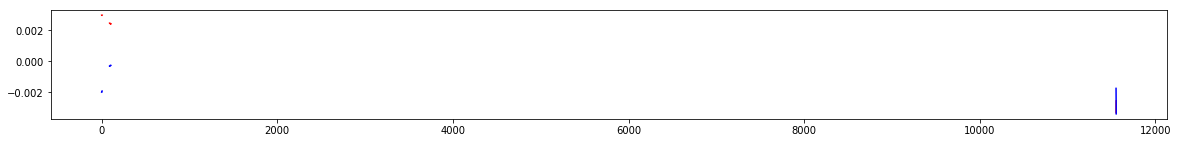

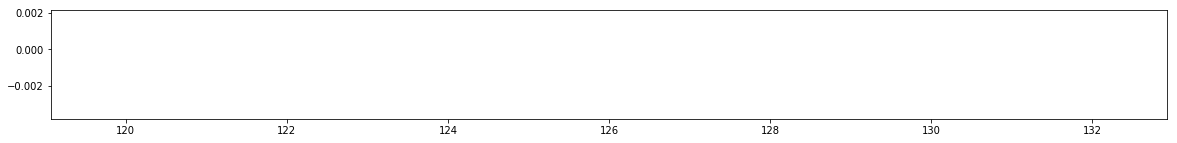

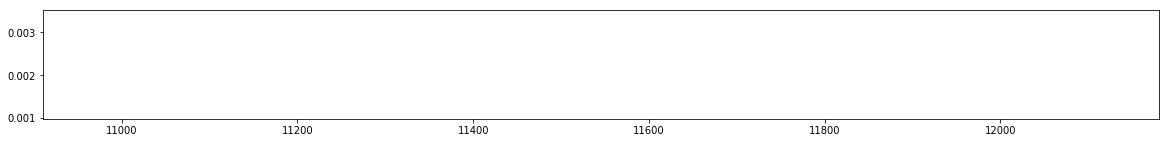

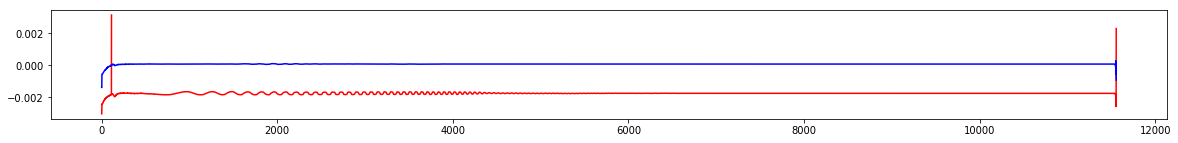

In [82]:
plt.figure(figsize=(20,2))
plt.plot(df['C0 post measx_mm'], color='r')
plt.plot(df['C0 post measy_mm'], color='b')
plt.figure(figsize=(20,2))
plt.plot(df['C1 post measx_mm'], color='r')
plt.plot(df['C1 post measy_mm'], color='b')
plt.figure(figsize=(20,2))
plt.plot(df['C2 post measx_mm'], color='r')
plt.plot(df['C2 post measy_mm'], color='b')
plt.figure(figsize=(20,2))
plt.plot(df['C3 post measx_mm'], color='r')
plt.plot(df['C3 post measy_mm'], color='b')
# plt.vlines(rt_peakIdx, 0, np.max(patch_diff) + 25, color='r')
#plt.title('TTM Data')


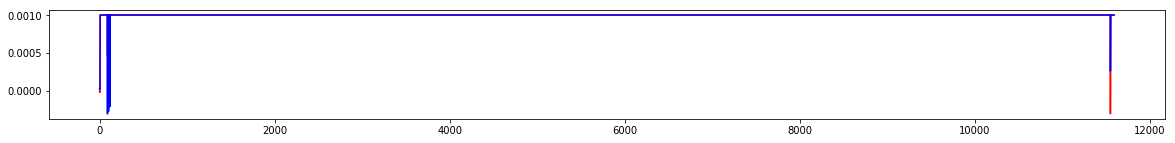

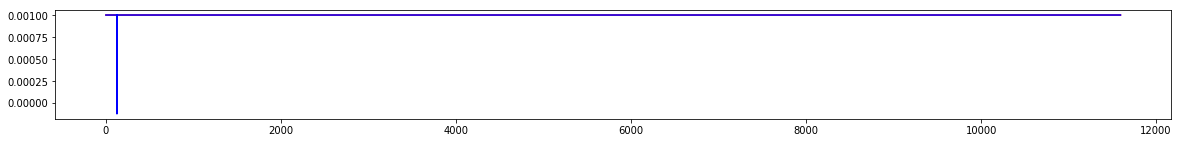

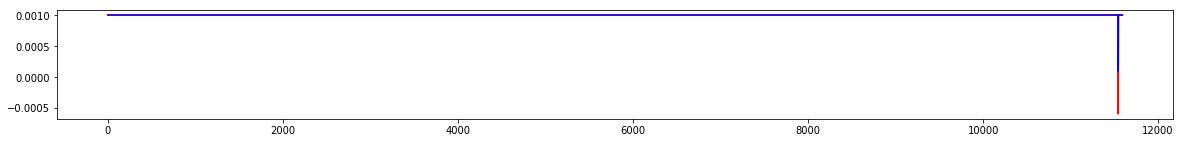

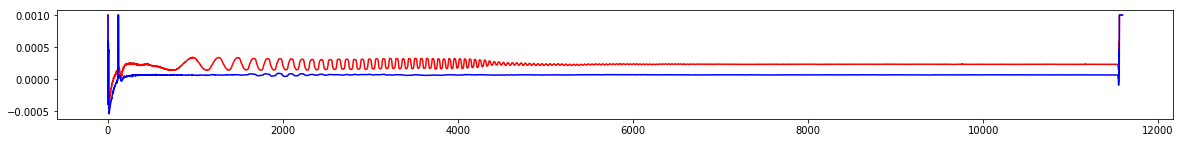

In [73]:
plt.figure(figsize=(20,2))
plt.plot(df['C0 measx_mm'], color='r')
plt.plot(df['C0 measy_mm'], color='b')
plt.figure(figsize=(20,2))
plt.plot(df['C1 measx_mm'], color='r')
plt.plot(df['C1 measy_mm'], color='b')
plt.figure(figsize=(20,2))
plt.plot(df['C2 measx_mm'], color='r')
plt.plot(df['C2 measy_mm'], color='b')
plt.figure(figsize=(20,2))
plt.plot(df['C3 measx_mm'], color='r')
plt.plot(df['C3 measy_mm'], color='b')


In [48]:
df = pd.DataFrame.from_records(ds, columns=cols)
#df.describe()
df['Cam3_TimeStamp']

0       127049
1       129649
2       132249
3       134849
4       137449
5       140041
6       142641
7       145241
8       147841
9       150441
10      153041
11      155641
12      158241
13      160841
14      163441
15      166034
16      168634
17      171234
18      173834
19      176434
20      179034
21      181634
22      184234
23      186834
24      189434
25      192026
26      194626
27      197226
28      199826
29      202426
         ...  
3621    538936
3622    541536
3623    544128
3624    546728
3625    549328
3626    551928
3627    554528
3628    557128
3629    559728
3630    562328
3631    564928
3632    567528
3633    570120
3634    572720
3635    575320
3636    577920
3637    580520
3638    583120
3639    585720
3640    588320
3641    590920
3642    593520
3643    596113
3644    598713
3645    601313
3646    603913
3647    606513
3648    609113
3649    611713
3650    614313
Name: Cam3_TimeStamp, dtype: int64

Cam1_TimeStamp
 Mean: 2599.250411
 Std : 2.265351
 Max : 2601.000000
 Min : 2592.000000
Cam2_TimeStamp
 Mean: 2599.250411
 Std : 2.265109
 Max : 2601.000000
 Min : 2592.000000
Cam3_TimeStamp
  delta at 50 is 0 (ts: 257011, ts_prev: 257011)
  delta at 243 is 0 (ts: 758667, ts_prev: 758667)
  delta at 436 is 0 (ts: 260324, ts_prev: 260324)
  delta at 629 is 0 (ts: 761980, ts_prev: 761980)
  delta at 791 is 0 (ts: 183052, ts_prev: 183052)
  delta at 822 is 0 (ts: 263629, ts_prev: 263629)
  delta at 1015 is 0 (ts: 765286, ts_prev: 765286)
  delta at 1208 is 0 (ts: 266942, ts_prev: 266942)
  delta at 1401 is 0 (ts: 768598, ts_prev: 768598)
  delta at 1594 is 0 (ts: 270255, ts_prev: 270255)
  delta at 1787 is 0 (ts: 771911, ts_prev: 771911)
  delta at 1980 is 0 (ts: 273560, ts_prev: 273560)
  delta at 2173 is 0 (ts: 775216, ts_prev: 775216)
  delta at 2366 is 0 (ts: 276873, ts_prev: 276873)
  delta at 2559 is 0 (ts: 778529, ts_prev: 778529)
  delta at 2752 is 0 (ts: 280186, ts_prev: 280186)


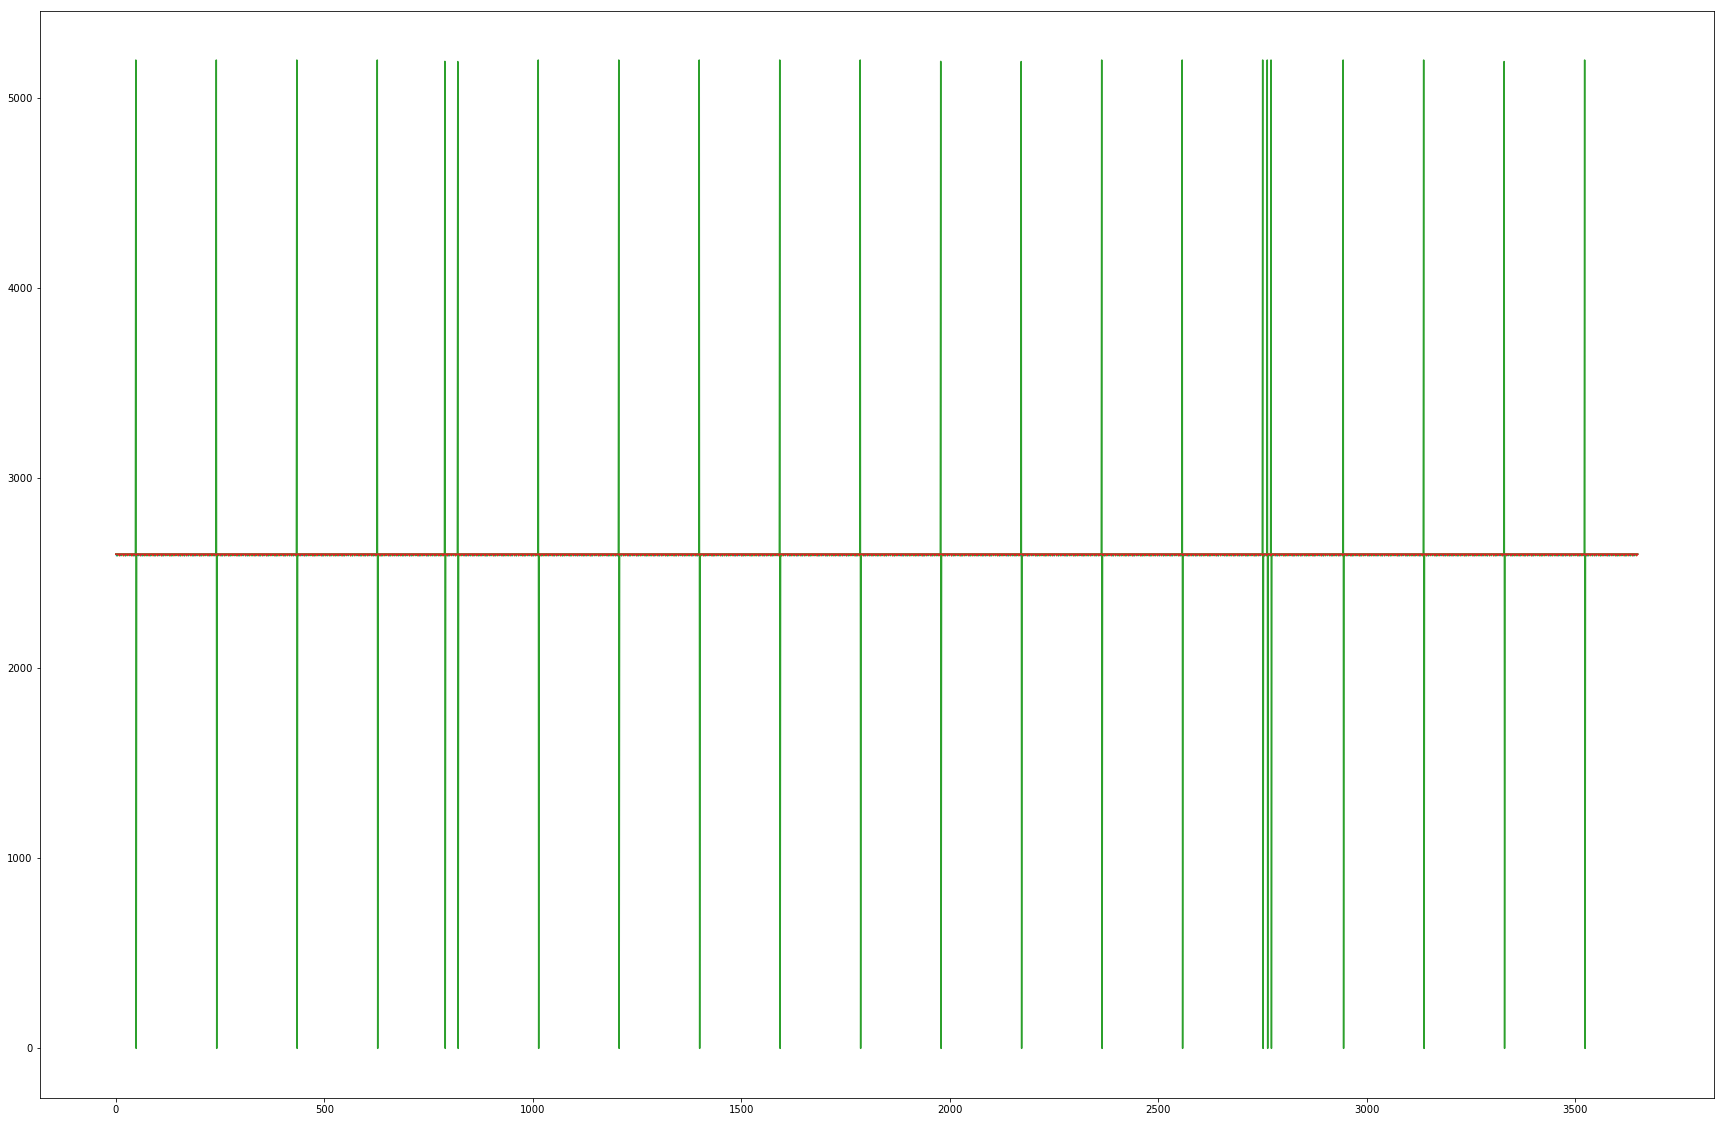

In [70]:
df = pd.DataFrame.from_records(ds, columns=cols)
#df.describe()

cols_to_plot = ['Cam1_TimeStamp', 'Cam2_TimeStamp', 'Cam3_TimeStamp', 'Cam4_TimeStamp']
plt.figure(figsize=(30,20))

for col in cols_to_plot:
    print("%s" % col)
    cam_ts_deltas = []
    offset = 0
    for idx, ts in enumerate(df[col]):
        if idx > 0:
            if ts_prev == ts:
                delta = ts - ts_prev
                print("  delta at %d is %d (ts: %d, ts_prev: %d)" % (idx, delta, ts, ts_prev))
            elif ts_prev < ts:
                delta = ts - ts_prev
            else:
                delta = (1e6 - ts_prev) + ts

            cam_ts_deltas.append(delta)

        ts_prev = ts

    plt.plot(cam_ts_deltas)

    cam_ts_deltas_np = np.array(cam_ts_deltas)
    print(" Mean: %f" % cam_ts_deltas_np.mean())
    print(" Std : %f" % cam_ts_deltas_np.std())
    print(" Max : %f" % cam_ts_deltas_np.max())
    print(" Min : %f" % cam_ts_deltas_np.min())
    

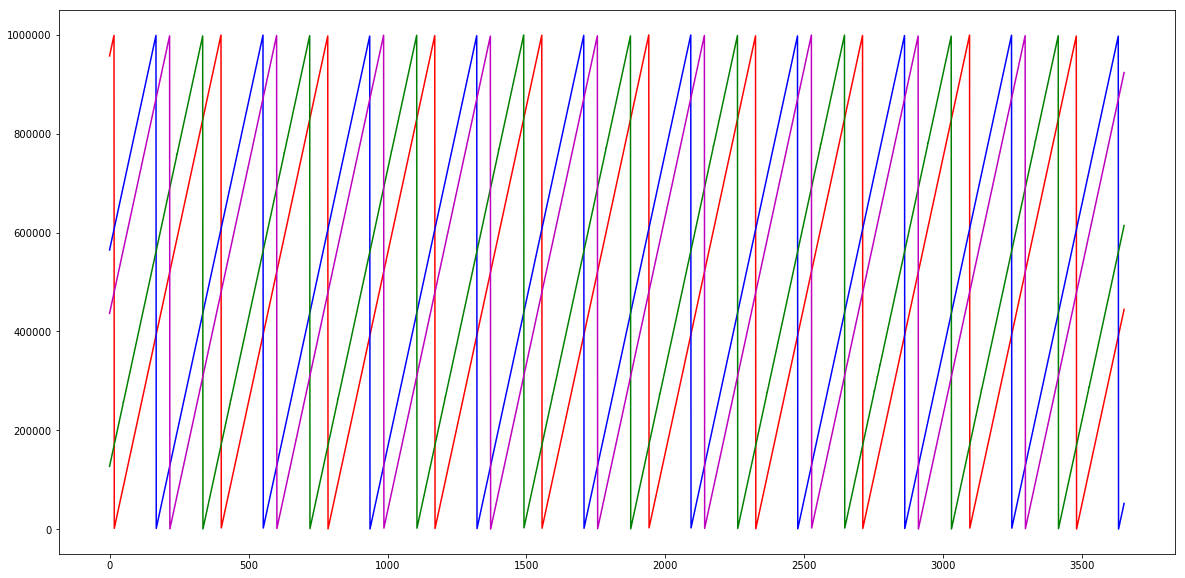

In [30]:
plt.figure(figsize=(20,10))
plt.plot(df['Cam1_TimeStamp'], color='r')
plt.plot(df['Cam2_TimeStamp'], color='b')
plt.plot(df['Cam3_TimeStamp'], color='g')
plt.plot(df['Cam4_TimeStamp'], color='m')
